# Exercise 8

In this exercise we are going to use the watershed algorithm to segment the *nuclei* seen earlier. To facilitate your work we copied some of the previous code. You therefore start with an image, and a mask of the contour of the *nuclei*. Our goal is to get whole *nuclei*. 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.external.tifffile import TiffFile
from skimage.measure import label, regionprops
from skimage.segmentation import watershed

import course_functions
datapath = course_functions.define_data_path()

#import your function
import sys
sys.path.append('../')
from course_functions import detect_nuclei

/Users/gw18g940/miniconda3/envs/teaching_test/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 14 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


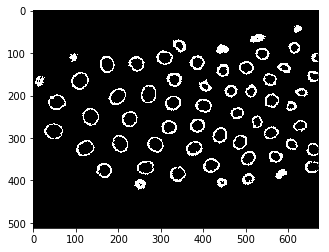

In [57]:
#load the image to process
data = TiffFile('../../Data/30567/30567.tif')
image = data.pages[3].asarray()
#create your mask
nuclei = detect_nuclei(image)
plt.imshow(nuclei, cmap = 'gray')
plt.show()

- recover the centroid coordinates of each *nucleus* by using labeling and region properties
- create a marker map where each centroid pixel is labeled
- use that marker map and the image for the wathershed algorithm

# Solutions 8

In [16]:
#find the centroid of each nucleus
im_label = label(nuclei)
regions = regionprops(im_label)
centroids = np.array([x.centroid for x in regions])

In [51]:
#create a marker map
markers = np.zeros(image.shape)
markers[centroids[:,0].astype(int),centroids[:,1].astype(int)] = 1
markers = label(markers)

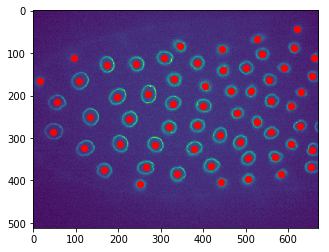

In [52]:
#check that everything is fine
plt.imshow(image)
plt.plot(centroids[:,1],centroids[:,0],'ro')
plt.show()

In [53]:
#use the watershed algorithm
im_water = watershed(image, markers=markers)

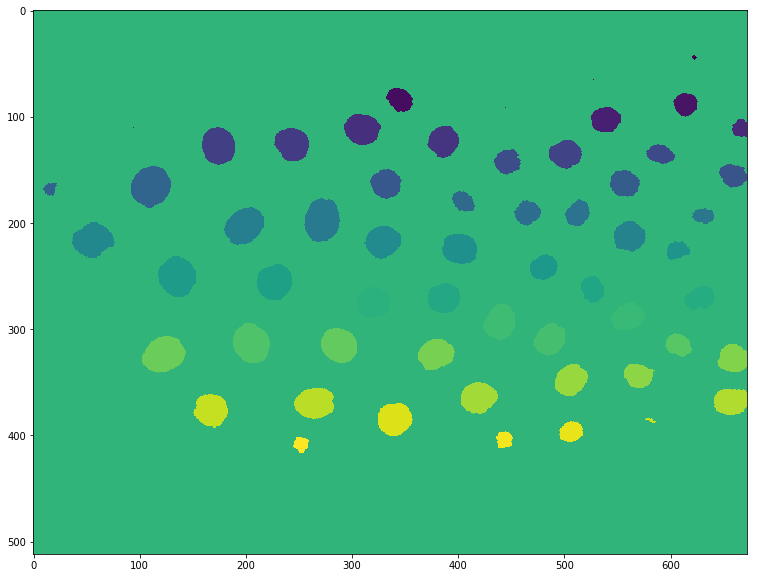

In [58]:
#plot the result
plt.figure(figsize=(20,10))
plt.imshow(im_water)
plt.show()